*For in-depth explanations of sensitivities please refer to the PDF write-up.*

In [6]:
import pandas as pd
import numpy as np
import concurrent.futures
import matplotlib.pyplot as plt
import pymodule.grapher as gp
from main import main
%matplotlib inline

In [2]:
with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    futures = {cf: executor.submit(main, n_simulations=1000000, correlation_factor=cf, return_df=True) 
               for cf in np.arange(0.65, 1.36, 0.01)}

In [3]:
frames = []
for cf, future in futures.items():
    try:
        df = future.result().assign(**{"cf": cf})
        frames.append(df)
    except Exception as e:
        print(f"Exception occured on cf = {round(cf, 2)}: {e}")
        pass
df = pd.concat(frames).reset_index()
df["distribution_type"] = df["distribution_type"].map(lambda x: "students_t" if "students_t" in x else x)
df = df.groupby(["cf", "distribution_type"])[[1, 2, 3, 4, 5]].mean().reset_index()

Exception occured on cf = 1.16: Matrix is not positive definite
Exception occured on cf = 1.19: Matrix is not positive definite
Exception occured on cf = 1.26: Matrix is not positive definite


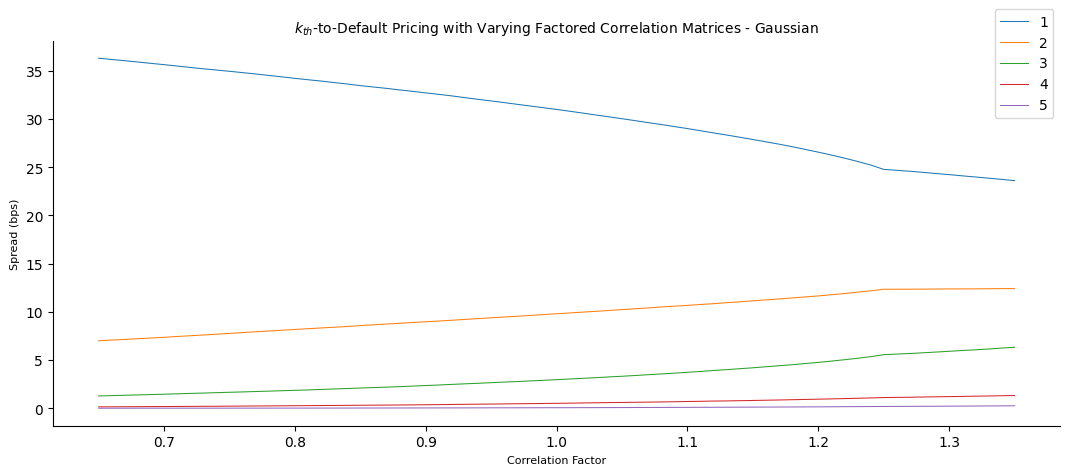

In [4]:
df_gaussian = df.loc[df["distribution_type"] == "gaussian"].copy().drop("distribution_type", axis=1).set_index("cf")
gp.graph(
    df=df_gaussian*10000,
    cols=df_gaussian.columns,
    kind=plt.plot,
    figsize=(13, 5),
    title=r"$k_{th}$-to-Default Pricing with Varying Factored Correlation Matrices - Gaussian",
    xlabel="Correlation Factor",
    ylabel="Spread (bps)",
    lw=0.75
)

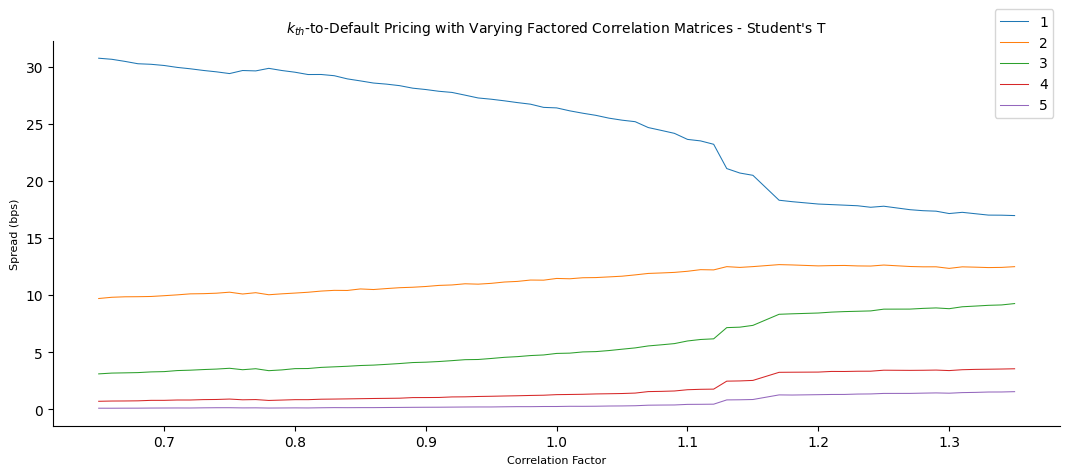

In [5]:
df_students_t = df.loc[df["distribution_type"] == "students_t"].copy().drop("distribution_type", axis=1).set_index("cf")
gp.graph(
    df=df_students_t*10000,
    cols=df_students_t.columns,
    kind=plt.plot,
    figsize=(13, 5),
    title=r"$k_{th}$-to-Default Pricing with Varying Factored Correlation Matrices - Student's T",
    xlabel="Correlation Factor",
    ylabel="Spread (bps)",
    lw=0.75
)